# Revised Topic using Morphological Transformation

## 1. Global Processing Morphological Dilation

- Morphological Closing was used because enhancing traces wont be possible by Morphological Dilation alone since dilation only concerns about **expanding holes/gaps** in the image.
- Shown below is the image being processed using dilation only.

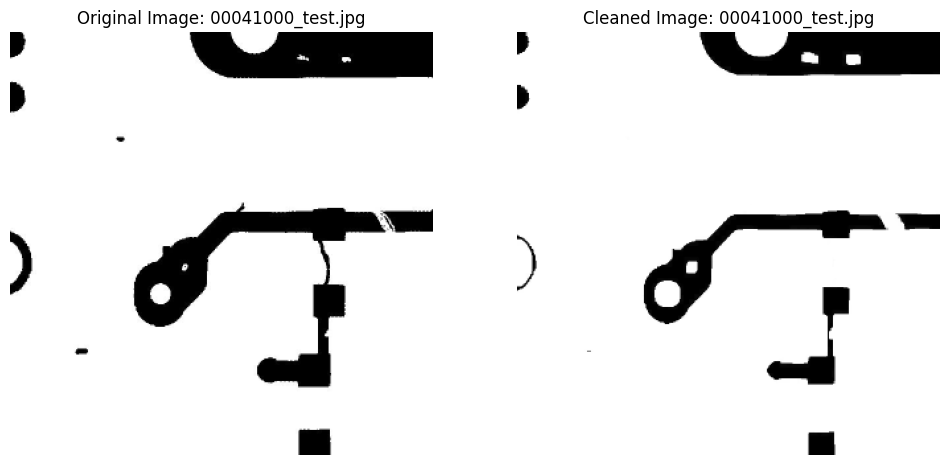

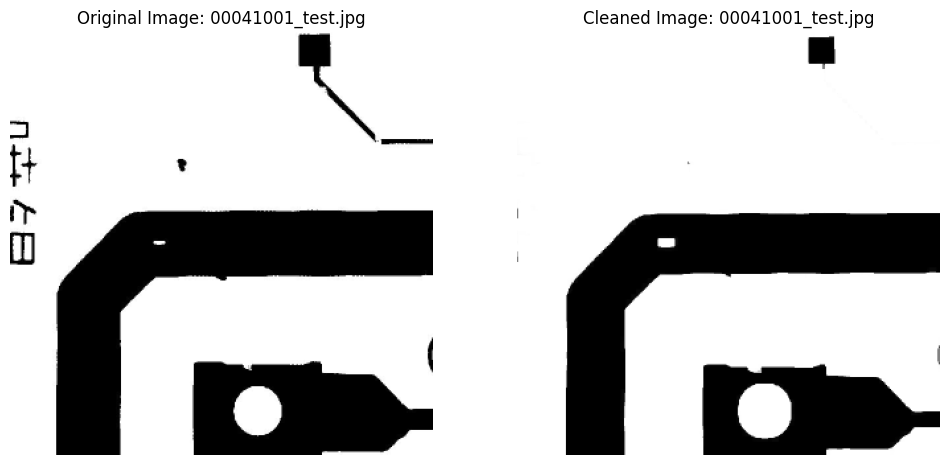

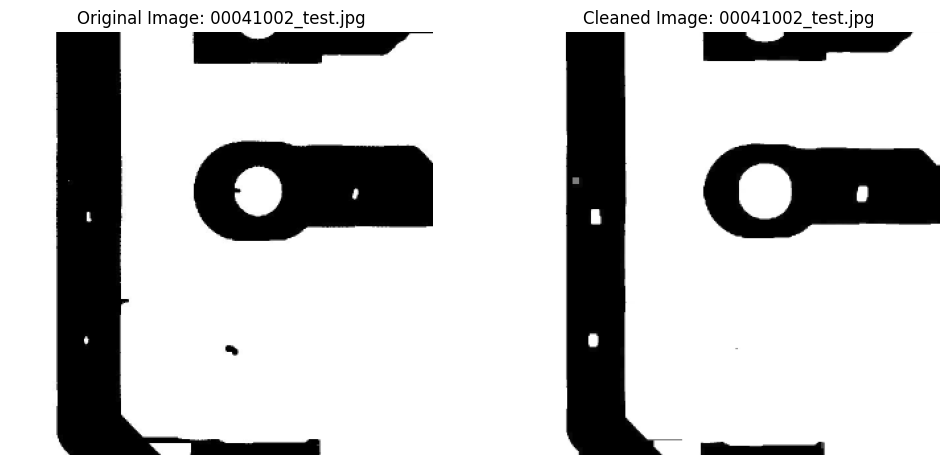

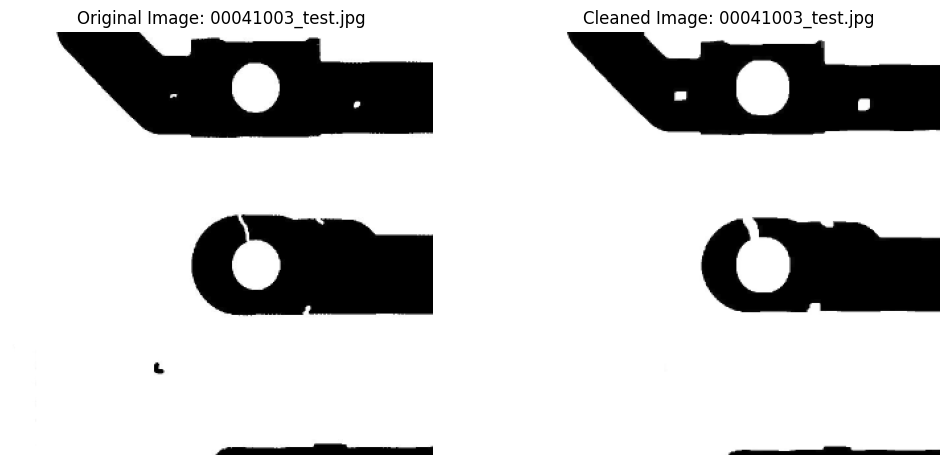

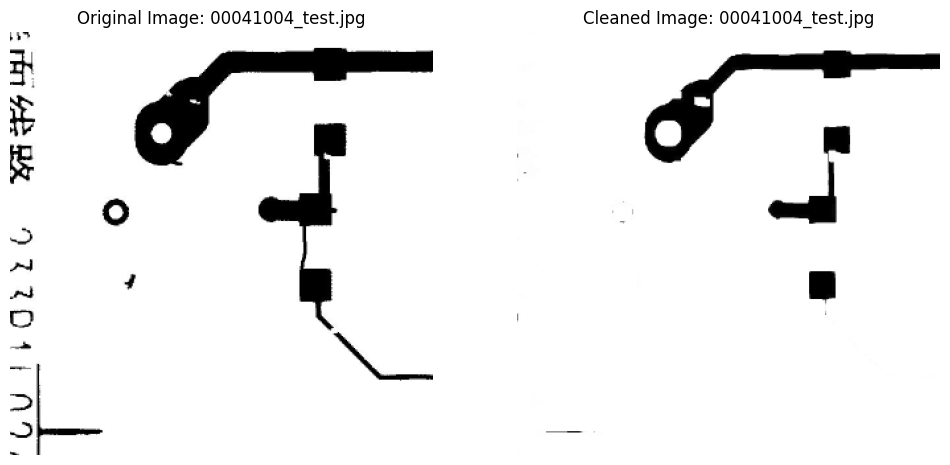

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Specify the folder path
folder_path = "00041"

# Step 2: List and filter files with "test" in their name
all_files = os.listdir(folder_path)
test_files = [file for file in all_files if "test" in file]
test_files = test_files[:5]

# Step 3: Define the kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Step 4: Process each filtered file
for test_file in test_files:
    file_path = os.path.join(folder_path, test_file)
    
    # Read the image in grayscale
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to read image: {test_file}")
        continue
    
    # Resize the image for manageability
    resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

    # Apply dilation to enhance the traces
    cleaned_image = cv2.dilate(resized_image, kernel, iterations=2)

    # Step 5: Display the original image and the result after dilation
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Original Image: {test_file}")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cleaned_image, cmap='gray')
    plt.title(f"Cleaned Image: {test_file}")
    plt.axis('off')
    
    plt.show()


## 2. Global Processing Morphological Closing

- If we use Morphological Closing *(Erosion then Dilation)*, the results are shown below.

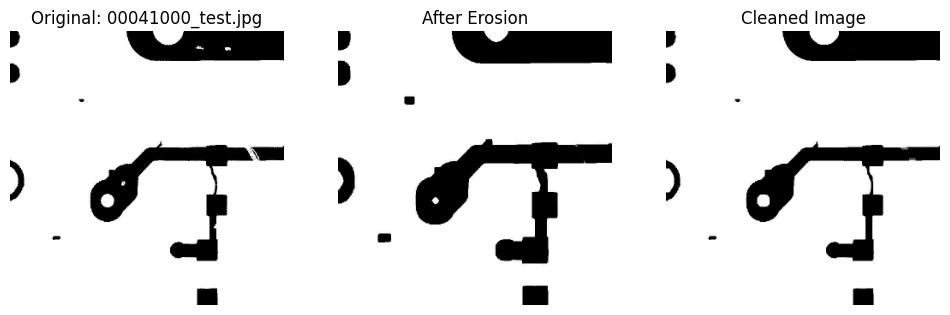

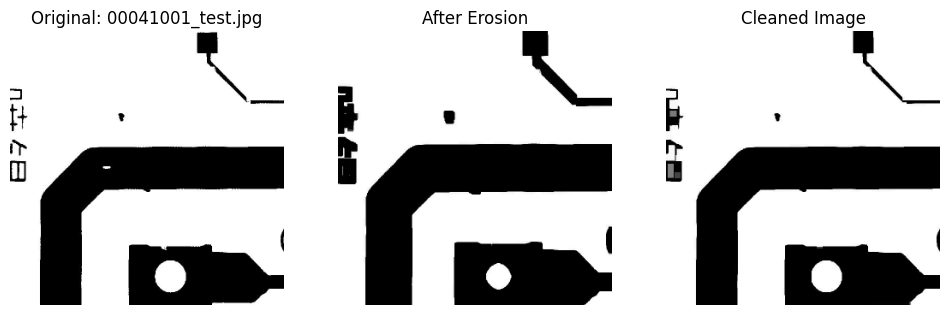

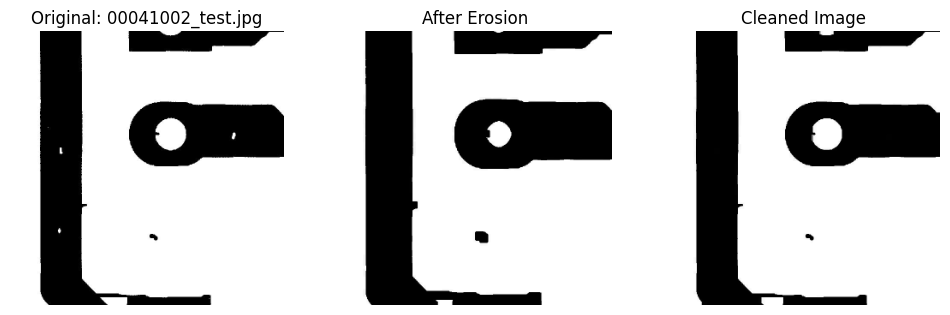

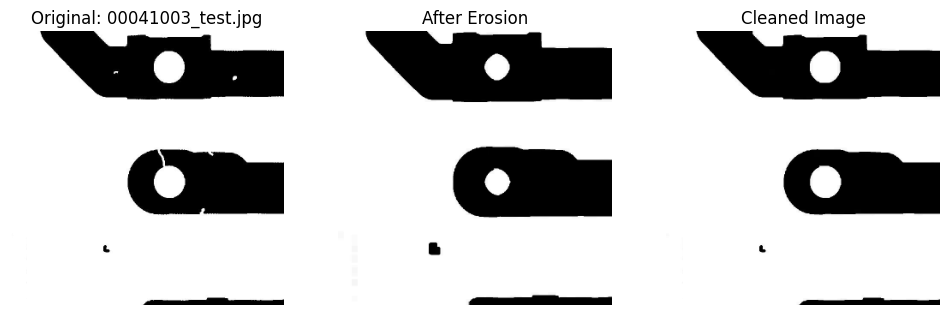

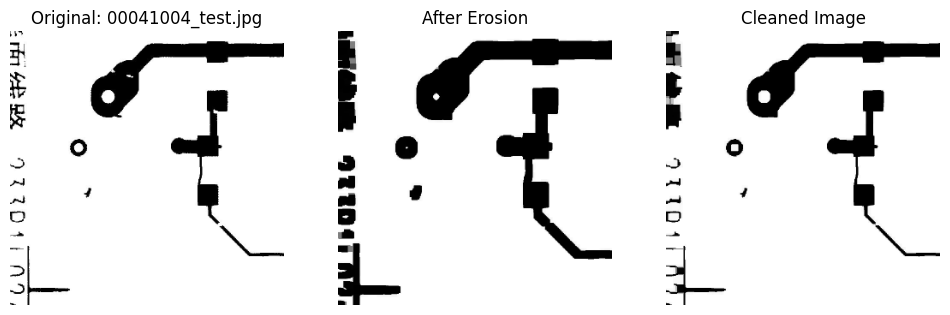

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Specify the folder path
folder_path = "00041"

# Step 2: List and filter files with "test" in their name
all_files = os.listdir(folder_path)
test_files = [file for file in all_files if "test" in file]
test_files = test_files[:5]

# Step 3: Define the kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Step 4: Process each filtered file
for test_file in test_files:
    file_path = os.path.join(folder_path, test_file)
    
    # Read the image in grayscale
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to read image: {test_file}")
        continue
    
    # Resize the image for manageability
    resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)

    # Apply erosion to reduce short circuits
    eroded_image = cv2.erode(resized_image, kernel, iterations=3)

    # Apply dilation to enhance the traces
    cleaned_image = cv2.dilate(eroded_image, kernel, iterations=3)

    # Step 5: Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(resized_image, cmap='gray')
    plt.title(f"Original: {test_file}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title("After Erosion")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cleaned_image, cmap='gray')
    plt.title("Cleaned Image")
    plt.axis('off')

    plt.show()

## 3. Morphological Dilation and Erosion to a Region of Interest

- But the results are still not up to what we are expected, so we created a program that we can manually improve PCB Traces using Morphological Dilation and Erosion.
- The code below allows us to manually select a region of interest to that are need of enhancements. We can select what opreation modes (Dilation or Erosion) to use to specific areas we want to enhance.

Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
Image saved to processed_image1.jpg
No ROI selected. Exiting ROI selection mode.


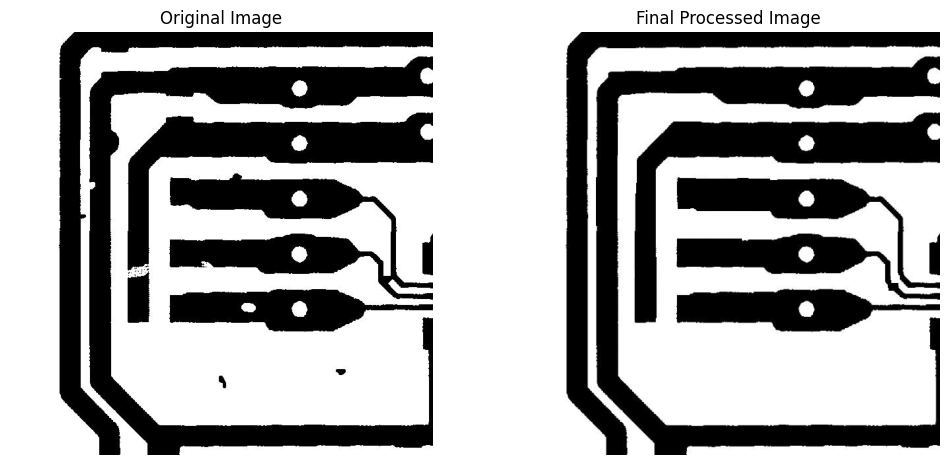

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    """Dummy function for trackbar callbacks."""
    pass

def save_image(image, path):
    """Saves the processed image to a file."""
    cv2.imwrite(path, image)
    print(f"Image saved to {path}")

# Load the image in grayscale
image_path = "00041/00041013_test.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded successfully
if original_image is None:
    print(f"Error: Image not loaded. Check the file path: {image_path}")
    exit()

# Resize the image for better visualization
resize_width = 600
aspect_ratio = resize_width / original_image.shape[1]
resize_height = int(original_image.shape[0] * aspect_ratio)
processed_image = cv2.resize(original_image, (resize_width, resize_height))

# Create control windows
cv2.namedWindow("Controls", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Controls", 400, 300)  # Set fixed width and height for the Controls window
cv2.namedWindow("Morphological Operations")

# Create trackbars in the "Controls" window
cv2.createTrackbar("Threshold", "Controls", 127, 255, nothing)
cv2.createTrackbar("Kernel Size", "Controls", 3, 20, nothing)
cv2.createTrackbar("Iterations", "Controls", 1, 10, nothing)
cv2.createTrackbar("Operation", "Controls", 0, 1, nothing)  # 0 = Erosion, 1 = Dilation
cv2.createTrackbar("Save", "Controls", 0, 1, nothing)  # 0 = Do not save, 1 = Save

# Allow the user to select and process multiple ROIs
while True:
    # Let the user select ROI from the processed image
    roi = cv2.selectROI("Select ROI", processed_image, showCrosshair=True)
    if roi == (0, 0, 0, 0):  # No ROI selected
        print("No ROI selected. Exiting ROI selection mode.")
        break  # Exit the ROI selection mode

    x, y, w, h = map(int, roi)
    roi_image = processed_image[y:y+h, x:x+w].copy()  # Create a copy of the selected ROI to prevent issues with trackbars

    # Processing loop for this ROI
    while True:
        # Get trackbar positions for settings
        threshold = cv2.getTrackbarPos("Threshold", "Controls")
        kernel_size = cv2.getTrackbarPos("Kernel Size", "Controls")
        iterations = cv2.getTrackbarPos("Iterations", "Controls")
        operation = cv2.getTrackbarPos("Operation", "Controls")  # 0 = Erosion, 1 = Dilation
        save_flag = cv2.getTrackbarPos("Save", "Controls")  # Check if Save is triggered

        # Ensure kernel size is odd and not zero
        kernel_size = max(1, kernel_size)
        if kernel_size % 2 == 0:
            kernel_size += 1

        # Apply binary threshold to the ROI
        _, thresh_image = cv2.threshold(roi_image, threshold, 255, cv2.THRESH_BINARY)

        # Create the kernel
        kernel = np.ones((kernel_size, kernel_size), np.uint8)

        # Apply erosion or dilation
        if operation == 0:
            processed_roi = cv2.erode(thresh_image, kernel, iterations=iterations)
        else:
            processed_roi = cv2.dilate(thresh_image, kernel, iterations=iterations)

        # Display the processed image using OpenCV
        display_image = processed_image.copy()
        display_image[y:y+h, x:x+w] = processed_roi  # Update the display image with the processed ROI

        cv2.imshow("Morphological Operations", display_image)

        # Save the image if the Save button (trackbar) is triggered
        if save_flag == 1:
            processed_image[y:y+h, x:x+w] = processed_roi  # Save the changes to the main image
            save_image(processed_image, f"processed_image1.jpg")  # Save with a generic name
            cv2.setTrackbarPos("Save", "Controls", 0)  # Reset the Save button (trackbar) to 0
            break  # Exit the ROI adjustment loop to select another ROI

        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # Exit on ESC
            break

    if key == 27:  # Exit if ESC is pressed
        break

# Display the original and final processed image using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Final Processed Image")
plt.axis('off')

plt.show()

cv2.destroyAllWindows()


## 4. Morphological Closing and Opening to a Region of Interest

- In this code we use **Morphological Closing and Opening** which is the combination of the Morphological Dilation and Erosion.
- **Morphological Opening** is an erosion followed by a dilation using a specified kernel (structuring element).
- **Morphological Closing** is a dilation followed by an erosion using a specified kernel (structuring element).

Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
Image saved to processed_image.jpg
No ROI selected. Exiting ROI selection mode.


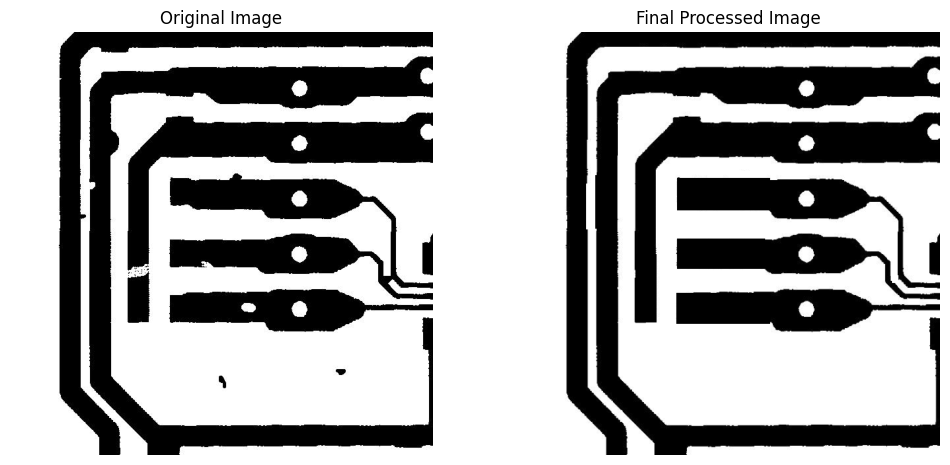

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    """Dummy function for trackbar callbacks."""
    pass

def save_image(image, path):
    """Saves the processed image to a file."""
    cv2.imwrite(path, image)
    print(f"Image saved to {path}")

# Load the image in grayscale
image_path = "00041/00041013_test.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded successfully
if original_image is None:
    print(f"Error: Image not loaded. Check the file path: {image_path}")
    exit()

# Resize the image for better visualization
resize_width = 600
aspect_ratio = resize_width / original_image.shape[1]
resize_height = int(original_image.shape[0] * aspect_ratio)
processed_image = cv2.resize(original_image, (resize_width, resize_height))

# Create control windows
cv2.namedWindow("Controls", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Controls", 400, 300)  # Set fixed width and height for the Controls window
cv2.namedWindow("Morphological Operations")

# Create trackbars in the "Controls" window
cv2.createTrackbar("Threshold", "Controls", 127, 255, nothing)
cv2.createTrackbar("Kernel Size", "Controls", 3, 20, nothing)
cv2.createTrackbar("Iterations", "Controls", 1, 10, nothing)
cv2.createTrackbar("Operation", "Controls", 0, 1, nothing)  # 0 = Opening, 1 = Closing
cv2.createTrackbar("Save", "Controls", 0, 1, nothing)  # 0 = Do not save, 1 = Save

# Allow the user to select and process multiple ROIs
while True:
    # Let the user select ROI from the processed image
    roi = cv2.selectROI("Select ROI", processed_image, showCrosshair=True)
    if roi == (0, 0, 0, 0):  # No ROI selected
        print("No ROI selected. Exiting ROI selection mode.")
        break  # Exit the ROI selection mode

    x, y, w, h = map(int, roi)
    roi_image = processed_image[y:y+h, x:x+w].copy()  # Create a copy of the selected ROI to prevent issues with trackbars

    # Processing loop for this ROI
    while True:
        # Get trackbar positions for settings
        threshold = cv2.getTrackbarPos("Threshold", "Controls")
        kernel_size = cv2.getTrackbarPos("Kernel Size", "Controls")
        iterations = cv2.getTrackbarPos("Iterations", "Controls")
        operation = cv2.getTrackbarPos("Operation", "Controls")  # 0 = Opening, 1 = Closing
        save_flag = cv2.getTrackbarPos("Save", "Controls")  # Check if Save is triggered

        # Ensure kernel size is odd and not zero
        kernel_size = max(1, kernel_size)
        if kernel_size % 2 == 0:
            kernel_size += 1

        # Apply binary threshold to the ROI
        _, thresh_image = cv2.threshold(roi_image, threshold, 255, cv2.THRESH_BINARY)

        # Create the kernel
        kernel = np.ones((kernel_size, kernel_size), np.uint8)

        # Apply opening or closing
        if operation == 0:
            processed_roi = cv2.morphologyEx(thresh_image, cv2.MORPH_OPEN, kernel, iterations=iterations)
        else:
            processed_roi = cv2.morphologyEx(thresh_image, cv2.MORPH_CLOSE, kernel, iterations=iterations)

        # Display the processed image using OpenCV
        display_image = processed_image.copy()
        display_image[y:y+h, x:x+w] = processed_roi  # Update the display image with the processed ROI

        cv2.imshow("Morphological Operations", display_image)

        # Save the image if the Save button (trackbar) is triggered
        if save_flag == 1:
            processed_image[y:y+h, x:x+w] = processed_roi  # Save the changes to the main image
            save_image(processed_image, f"processed_image.jpg")  # Save with a generic name
            cv2.setTrackbarPos("Save", "Controls", 0)  # Reset the Save button (trackbar) to 0
            break  # Exit the ROI adjustment loop to select another ROI

        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # Exit on ESC
            break

    if key == 27:  # Exit if ESC is pressed
        break

# Display the original and final processed image using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed_image, cmap='gray')
plt.title("Final Processed Image")
plt.axis('off')

plt.show()

cv2.destroyAllWindows()
